## Human Survival Status Prediction After Heart Attack
There are some factors that affects Death Event. This dataset contains person's information like age ,sex , blood pressure, smoke, diabetes,ejection fraction, creatinine phosphokinase, serum_creatinine, serum_sodium, time and we have to predict their DEATH EVENT.

### Important Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error
from colorama import Fore, Back, Style 

In [2]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")


## Features and label of data set

 anaemia: Decrease of red blood cells or hemoglobin (boolean)
 
 Creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
 
 diabetes: If the patient has diabetes (boolean)
 
 ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)
 
 high_blood_pressure: If the patient has hypertension (boolean)
 
 platelets: Platelets in the blood (kiloplatelets/mL)
 
 serum_creatinine: Level of serum creatinine in the blood (mg/dL)
 
 erum_sodium: Level of serum sodium in the blood (mEq/L)
 
 Sex: Woman or man (boolean)
 
 Death Event: Survived or not survived (boolean)

### Important note

Sex - Gender of patient Male = 1, Female =0

Age - Age of patient

Diabetes - 0 = No, 1 = Yes

Anaemia - 0 = No, 1 = Yes

High_blood_pressure - 0 = No, 1 = Yes

Smoking - 0 = No, 1 = Yes

DEATH_EVENT - 0 = No, 1 = Yes


## Eploration of data

In [3]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Checking for null values

In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


### Distribution of our data

In [7]:
plt.figure(figsize=(22,6),dpi=800)
sns.countplot(data=df,x='age')
plt.title("Age distribution")

Text(0.5, 1.0, 'Age distribution')

## Distribution of data acccording to gender

<AxesSubplot:xlabel='sex', ylabel='age'>

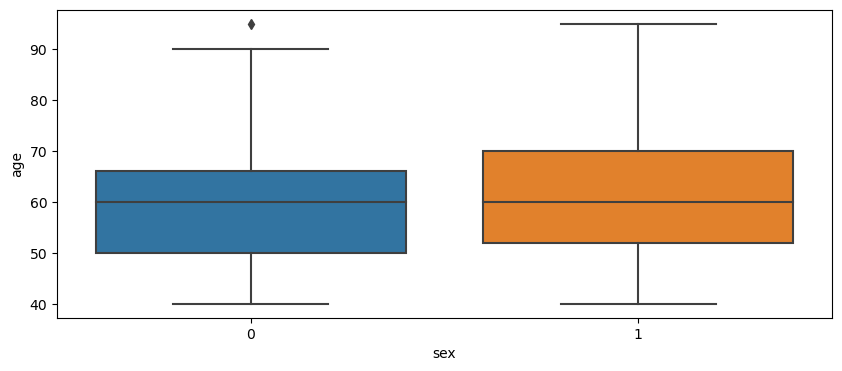

In [8]:
plt.figure(figsize=(10,4),dpi=100)
sns.boxplot(data=df,x='sex',y='age')

# 

C:\Users\Surendra\AppData\Local\Temp\ipykernel_14120\2909793371.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_survi = male[df["DEATH_EVENT"]==0]
C:\Users\Surendra\AppData\Local\Temp\ipykernel_14120\2909793371.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_not = male[df["DEATH_EVENT"]==1]
C:\Users\Surendra\AppData\Local\Temp\ipykernel_14120\2909793371.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_survi = female[df["DEATH_EVENT"]==0]
C:\Users\Surendra\AppData\Local\Temp\ipykernel_14120\2909793371.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_not = female[df["DEATH_EVENT"]==1]
C:\Users\Surendra\AppData\Local\Temp\ipykernel_14120\2909793371.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = [len(male[df["DEATH_EVENT"]==0]),len(male[df["DEATH_EVENT"]==1]), len(female[df["DEATH

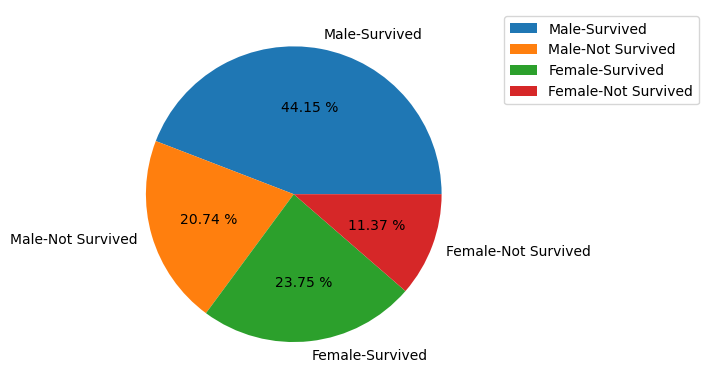

In [9]:
male = df[df["sex"]==1]
female =df[df["sex"]==0]

male_survi = male[df["DEATH_EVENT"]==0]
male_not = male[df["DEATH_EVENT"]==1]
female_survi = female[df["DEATH_EVENT"]==0]
female_not = female[df["DEATH_EVENT"]==1]
male_survi.reset_index(drop=True,inplace=True)
male_not.reset_index(drop=True,inplace=True)
female_survi.reset_index(drop=True,inplace=True)
female_not.reset_index(drop=True,inplace=True)
values = [len(male[df["DEATH_EVENT"]==0]),len(male[df["DEATH_EVENT"]==1]), len(female[df["DEATH_EVENT"]==0]),len(female[df["DEATH_EVENT"]==1])]
labels = ['Male-Survived','Male-Not Survived', "Female-Survived", "Female-Not Survived"]
plt.pie(values,labels=labels,autopct="%.2f %%")
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

# 

# 

## Survival status according to age

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

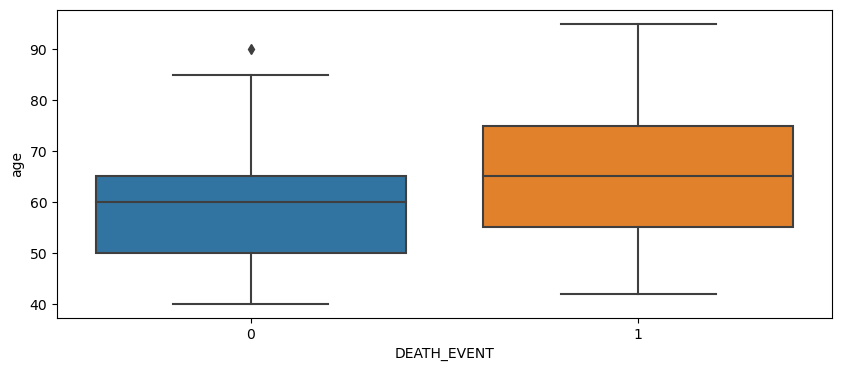

In [10]:
plt.figure(figsize=(10,4),dpi=100)
sns.boxplot(data=df,x='DEATH_EVENT',y='age')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

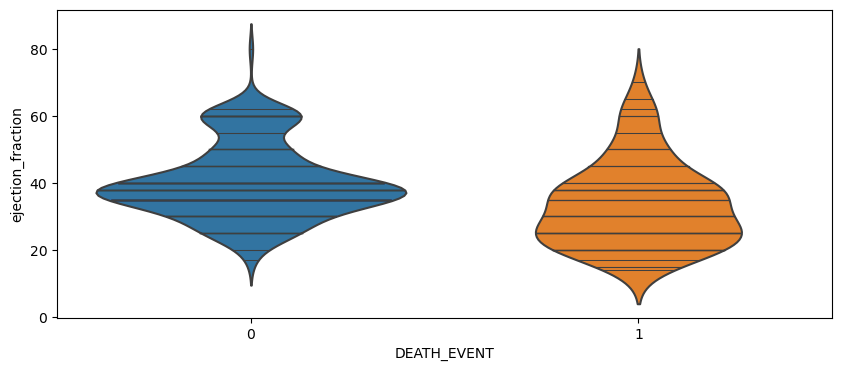

In [11]:
plt.figure(figsize=(10,4),dpi=100)
sns.violinplot(data=df,y='ejection_fraction',x='DEATH_EVENT',inner='stick',split=True)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='high_blood_pressure'>

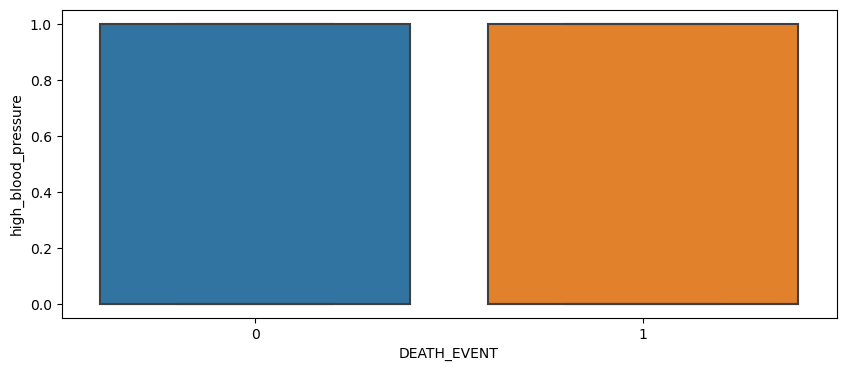

In [12]:
plt.figure(figsize=(10,4),dpi=100)
sns.boxplot(data=df,y='high_blood_pressure',x='DEATH_EVENT')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

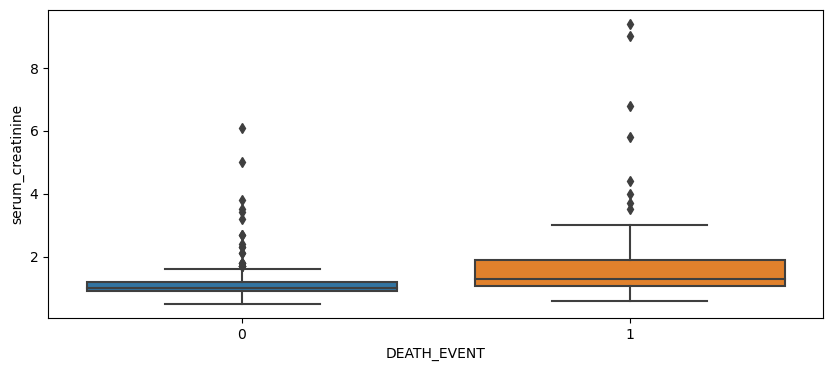

In [13]:
plt.figure(figsize=(10,4),dpi=100)
sns.boxplot(data=df,y='serum_creatinine',x='DEATH_EVENT')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='time'>

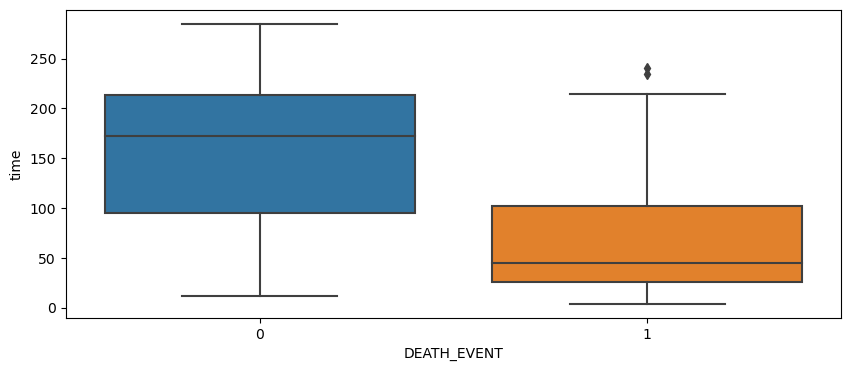

In [14]:
plt.figure(figsize=(10,4),dpi=100)
sns.boxplot(data=df,y='time',x='DEATH_EVENT')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_sodium'>

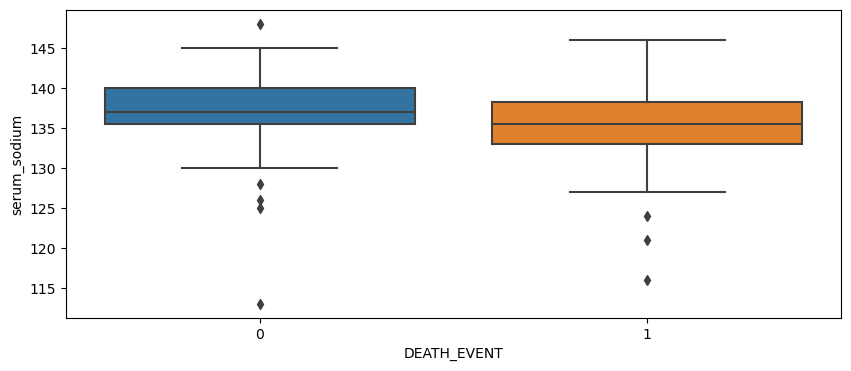

In [15]:
plt.figure(figsize=(10,4),dpi=100)
sns.boxplot(data=df,y='serum_sodium',x='DEATH_EVENT')

In [16]:
#plt.figure(figsize=(25,4),dpi=100)
#sns. pairplot(df,hue='DEATH_EVENT')

<AxesSubplot:>

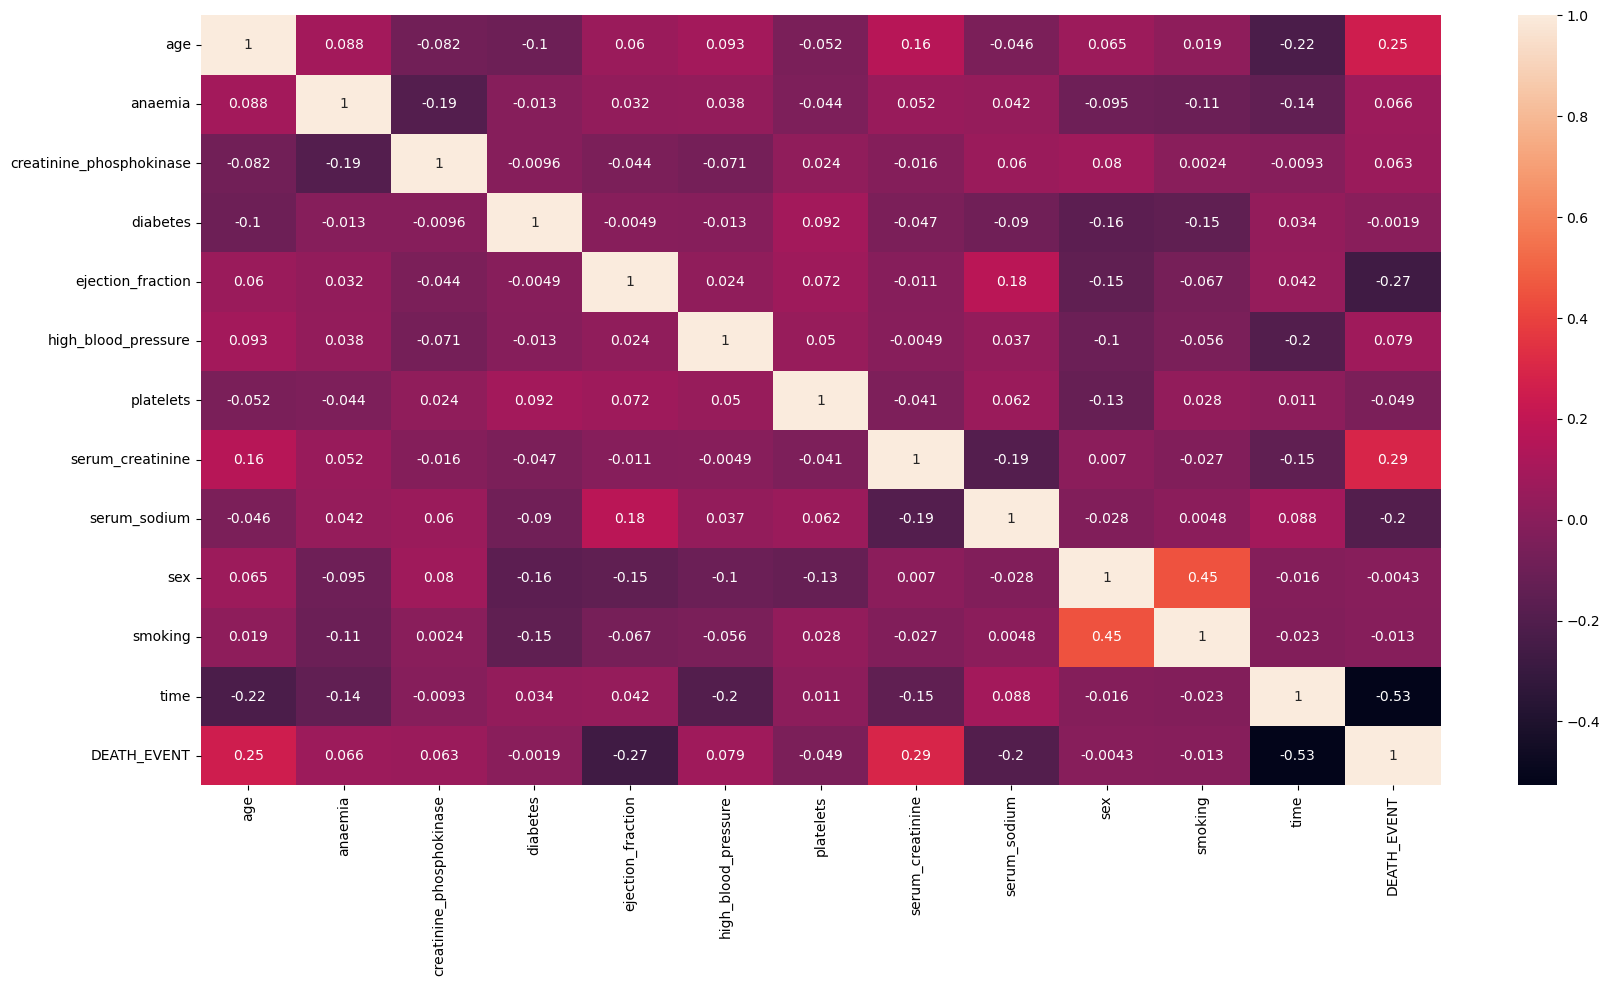

In [17]:
plt.figure(figsize=(20,10),dpi=100)
sns.heatmap(df.corr(),annot=True)

### Logistic Regression

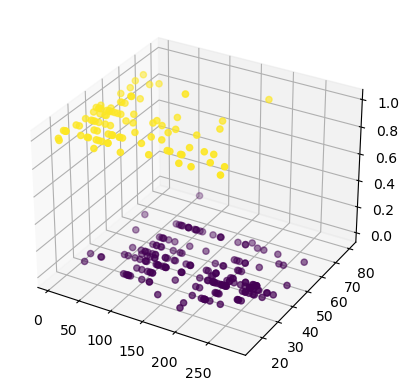

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['time'],df['ejection_fraction'],df['DEATH_EVENT'],c=df['DEATH_EVENT'])

In [19]:
Features = ['time','ejection_fraction','serum_creatinine','high_blood_pressure','serum_sodium']
x = df[Features]
y = df["DEATH_EVENT"]


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.1, random_state=101)

In [21]:
scaler=StandardScaler()

In [22]:
scaled_x_train=scaler.fit_transform(x_train)

In [23]:
scaled_x_test=scaler.transform(x_test)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
accuracy_list = []

In [26]:
log_model = LogisticRegression()
log_model.fit(scaled_x_train, y_train)

LogisticRegression()

In [27]:
log_model.coef_

array([[-1.4274213 , -0.76196611,  0.68057401,  0.05489217, -0.23402553]])

In [28]:
y_pred= log_model.predict(scaled_x_test)

In [29]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [30]:
log_reg_acc = accuracy_score(y_test,y_pred)
accuracy_list.append(100*log_reg_acc)

In [31]:
print(Fore.GREEN + "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

Accuracy of Logistic Regression is :  96.67%


In [32]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [33]:
cmtest=confusion_matrix(y_test,y_pred)

Text(45.722222222222214, 0.5, 'actual value')

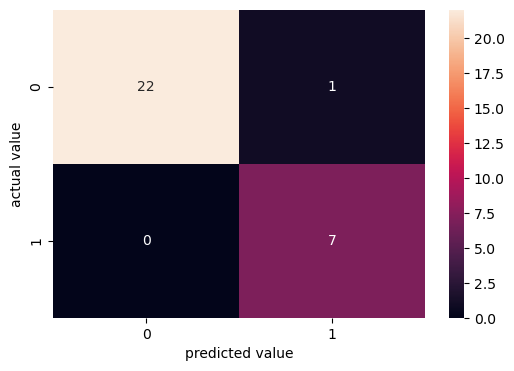

In [34]:
plt.figure(figsize=(6,4))
sns.heatmap(cmtest,annot=True)
plt.xlabel("predicted value")
plt.ylabel("actual value")

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.94      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



## KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
test_error_rates=[]
for k in range(1,30):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_x_train,y_train)
    y_knn_pred_test=knn_model.predict(scaled_x_test)
    test_error=1-accuracy_score(y_test,y_knn_pred_test)
    test_error_rates.append(test_error);

C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

In [38]:
test_error_rates

[0.1333333333333333,
 0.19999999999999996,
 0.16666666666666663,
 0.19999999999999996,
 0.16666666666666663,
 0.19999999999999996,
 0.16666666666666663,
 0.19999999999999996,
 0.16666666666666663,
 0.16666666666666663,
 0.16666666666666663,
 0.16666666666666663,
 0.1333333333333333,
 0.16666666666666663,
 0.16666666666666663,
 0.16666666666666663,
 0.16666666666666663,
 0.16666666666666663,
 0.1333333333333333,
 0.16666666666666663,
 0.16666666666666663,
 0.1333333333333333,
 0.1333333333333333,
 0.1333333333333333,
 0.1333333333333333,
 0.09999999999999998,
 0.09999999999999998,
 0.09999999999999998,
 0.09999999999999998]

In [39]:
knn_model=KNeighborsClassifier(n_neighbors=26)
knn_model.fit(scaled_x_train,y_train)
y_knn_pred=knn_model.predict(scaled_x_test)

C:\Users\Surendra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [40]:
print(classification_report(y_test,y_knn_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        23
           1       1.00      0.57      0.73         7

    accuracy                           0.90        30
   macro avg       0.94      0.79      0.83        30
weighted avg       0.91      0.90      0.89        30



In [41]:
knn_acc =accuracy_score(y_test,y_knn_pred)
accuracy_list.append(100*knn_acc)

In [42]:
print(Fore.GREEN + "Accuracy of KNN is : ", "{:.2f}%".format(100*knn_acc))

Accuracy of KNN is :  90.00%


In [43]:
cmtest0=confusion_matrix(y_test,y_knn_pred)

Text(33.22222222222222, 0.5, 'actual value')

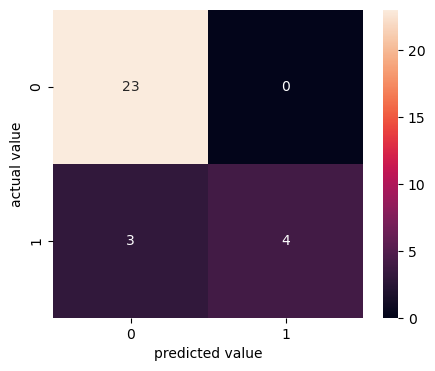

In [44]:
plt.figure(figsize=(5,4))
sns.heatmap(cmtest0,annot=True)
plt.xlabel("predicted value")
plt.ylabel("actual value")

# 

## Support Vector Machine

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svm=SVC()
param_grid={'C':[0.01,0.1,1],'kernel':['linear','rbf']}

In [46]:
grid=GridSearchCV(svm,param_grid)

In [47]:
grid.fit(scaled_x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [48]:
grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [49]:
svm_pred=grid.predict(scaled_x_test)

In [50]:
final_model=SVC(kernel='linear',C=1)
final_model.fit(scaled_x_train,y_train)

SVC(C=1, kernel='linear')

In [51]:
y_final_pred=final_model.predict(scaled_x_test)

In [52]:
print(classification_report(y_test,y_final_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.94      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



In [53]:
svm_acc =accuracy_score(y_test,y_final_pred)
accuracy_list.append(100*svm_acc)

In [54]:
print(Fore.GREEN + "Accuracy of SVM is : ", "{:.2f}%".format(100*svm_acc))

Accuracy of SVM is :  96.67%


In [55]:
cmtest1=confusion_matrix(y_test,y_final_pred)

Text(33.22222222222222, 0.5, 'actual value')

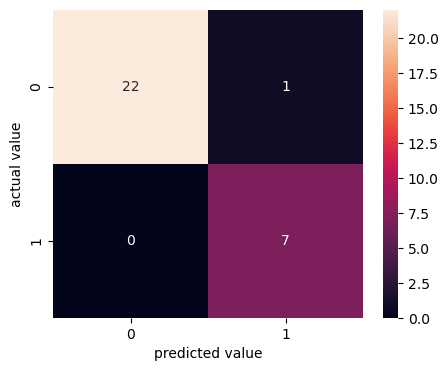

In [56]:
plt.figure(figsize=(5,4))
sns.heatmap(cmtest1,annot=True)
plt.xlabel("predicted value")
plt.ylabel("actual value")

In [57]:
accuracy_list
Accuracy={'Logistic regression':accuracy_list[0],'KNN':accuracy_list[1],'SVM': accuracy_list[2]}
Accuracy

{'Logistic regression': 96.66666666666667,
 'KNN': 90.0,
 'SVM': 96.66666666666667}

# 

## Saving the model

In [58]:
import pickle

In [59]:
with open('model.pkl','wb') as file:
    pickle.dump(final_model,file)